[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/idealo/image-super-resolution/blob/master/notebooks/ISR_Prediction_Tutorial.ipynb)

# Install ISR

In [0]:
!pip -q install ISR gdown

# Predict

## Get the pre-trained weights and data

(for more options on getting you data on Colab notebooks visit https://colab.research.google.com/notebooks/io.ipynb)

Get the weights with



In [2]:
#!wget https://media.githubusercontent.com/media/idealo/image-super-resolution/master/weights/sample_weights/rdn-C6-D20-G64-G064-x2/ArtefactCancelling/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5
#!wget https://media.githubusercontent.com/media/idealo/image-super-resolution/master/weights/sample_weights/rdn-C6-D20-G64-G064-x2/PSNR-driven/rdn-C6-D20-G64-G064-x2_PSNR_epoch086.hdf5
#!wget https://media.githubusercontent.com/media/idealo/image-super-resolution/master/weights/sample_weights/rdn-C3-D10-G64-G064-x2/PSNR-driven/rdn-C3-D10-G64-G064-x2_PSNR_epoch134.hdf5
#!wget https://media.githubusercontent.com/media/idealo/image-super-resolution/master/weights/sample_weights/rrdn-C4-D3-G32-G032-T10-x4/Perceptual/rrdn-C4-D3-G32-G032-T10-x4_epoch299.hdf5

import os
if not os.path.exists('weights/rrdn-C4-D3-G32-G032-T10-x4_epoch299.hdf'):
  # download pretrained weights
  !gdown https://drive.google.com/uc?id=1Sn9FFKXNWOPXdNzy-zmyVYB4eNRnXTKD
  !gdown https://drive.google.com/uc?id=1_1GGoHF5oq3W_iVVxx1SRDIa_mjwoe26
  !gdown https://drive.google.com/uc?id=1ro0Rk4xAqo-OEDGgLIYz-F0BHvmUUT2E
  !gdown https://drive.google.com/uc?id=1o3l_I60xHkdiWZG7UM0nZBblEontHs2W
  !mkdir weights
  !mv *.hdf5 weights

Downloading...
From: https://drive.google.com/uc?id=1Sn9FFKXNWOPXdNzy-zmyVYB4eNRnXTKD
To: /content/rdn-C3-D10-G64-G064-x2_PSNR_epoch134.hdf5
10.7MB [00:00, 65.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_1GGoHF5oq3W_iVVxx1SRDIa_mjwoe26
To: /content/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5
66.1MB [00:00, 107MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1ro0Rk4xAqo-OEDGgLIYz-F0BHvmUUT2E
To: /content/rdn-C6-D20-G64-G064-x2_PSNR_epoch086.hdf5
66.1MB [00:00, 76.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1o3l_I60xHkdiWZG7UM0nZBblEontHs2W
To: /content/rrdn-C4-D3-G32-G032-T10-x4_epoch299.hdf5
17.5MB [00:00, 47.9MB/s]


Download a sample image, in this case

In [3]:
!wget http://images.math.cnrs.fr/IMG/png/section8-image.png
!mkdir -p data/input/test_images
!mv *.png data/input/test_images

--2019-12-01 16:32:03--  http://images.math.cnrs.fr/IMG/png/section8-image.png
Resolving images.math.cnrs.fr (images.math.cnrs.fr)... 134.206.83.12
Connecting to images.math.cnrs.fr (images.math.cnrs.fr)|134.206.83.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114590 (112K) [image/png]
Saving to: ‘section8-image.png’

section8-image.png  100%[===================>] 111.90K   351KB/s    in 0.3s    

2019-12-01 16:32:03 (351 KB/s) - ‘section8-image.png’ saved [114590/114590]



Load the image with PIL

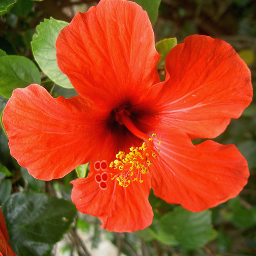

In [4]:
import numpy as np
from PIL import Image

img = Image.open('data/input/test_images/section8-image.png')
img

## Get predictions

### Create the model and run prediction
Create the RDN model, for which we provide pre-trained weights, and load them

Choose amongst the available model weights, compare the output if you wish.



In [5]:
from ISR.models import RDN, RRDN

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

#### RRDN GANS model

In [6]:
rrdn = RRDN(arch_params={'C': 4, 'D':3, 'G':32, 'G0':32, 'x':4, 'T': 10})
rrdn.model.load_weights('weights/rrdn-C4-D3-G32-G032-T10-x4_epoch299.hdf5')

Instructions for updating:
Colocations handled automatically by placer.


#### Large RDN model

In [0]:
rdn = RDN(arch_params={'C': 6, 'D':20, 'G':64, 'G0':64, 'x':2})
rdn.model.load_weights('weights/rdn-C6-D20-G64-G064-x2_PSNR_epoch086.hdf5')

#### Small RDN model

In [0]:
rdn = RDN(arch_params={'C': 3, 'D':10, 'G':64, 'G0':64, 'x':2})
rdn.model.load_weights('weights/rdn-C3-D10-G64-G064-x2_PSNR_epoch134.hdf5')

#### Large RDN noise cancelling, detail enchancing model

In [0]:
rdn = RDN(arch_params={'C': 6, 'D':20, 'G':64, 'G0':64, 'x':2})
rdn.model.load_weights('weights/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5')

#### Run prediction

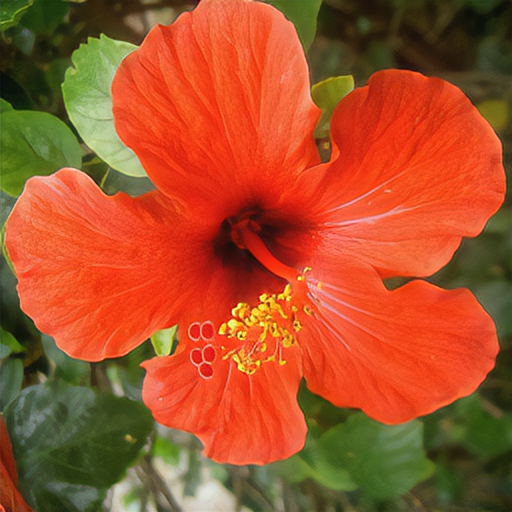

In [10]:
sr_img = rdn.predict(np.array(img))
Image.fromarray(sr_img)

### Usecase: upscaling noisy images

Now, for science, let's make it harder for the networks.

We compress the image into the jpeg format to introduce compression artefact and lose some information.

We will compare:
- the baseline bicubic scaling
- the basic model - Add Hyperlink
- a model trained to remove noise using perceptual loss with deep features and GANs training

So let's first  compress the image

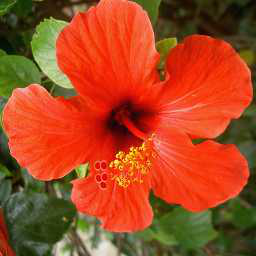

In [11]:
img.save('data/input/test_images/compressed.jpeg','JPEG', dpi=[300, 300], quality=50)
compressed_img = Image.open('data/input/test_images/compressed.jpeg')

compressed_img

(open the image in a new tab and zoom in to inspect it)

#### Baseline
Bicubic scaling

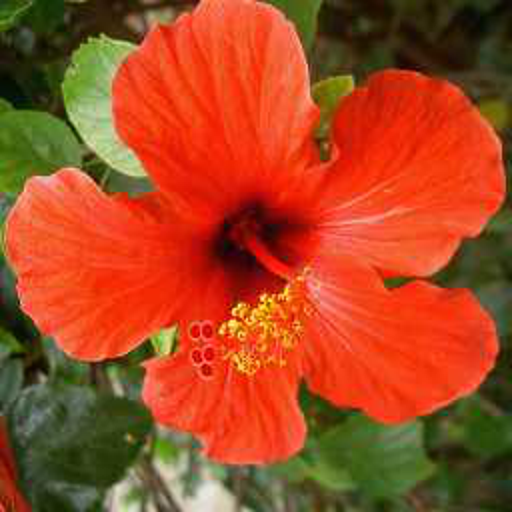

In [12]:
compressed_img.resize(size=(compressed_img.size[0]*2, compressed_img.size[1]*2), resample=Image.BICUBIC)

#### Large RDN model (PSNR trained)

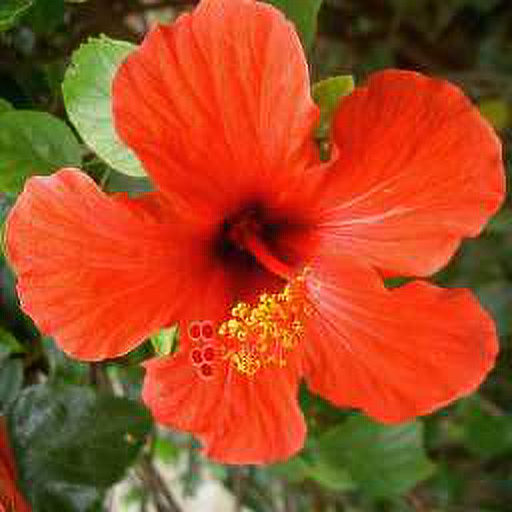

In [13]:
rdn = RDN(arch_params={'C': 6, 'D':20, 'G':64, 'G0':64, 'x':2})
rdn.model.load_weights('weights/rdn-C6-D20-G64-G064-x2_PSNR_epoch086.hdf5')
sr_img = rdn.predict(np.array(compressed_img))
Image.fromarray(sr_img)

#### Small RDN model  (PSNR trained)

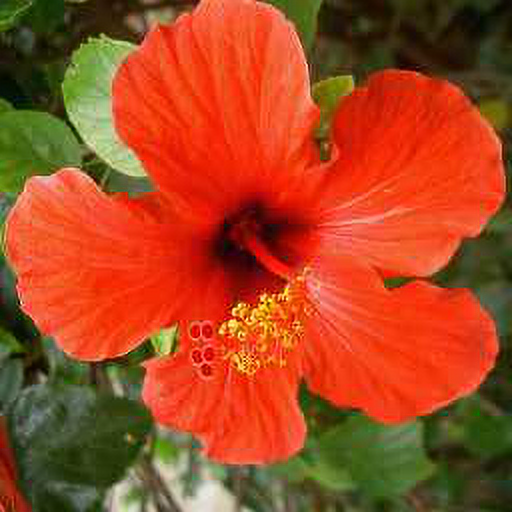

In [14]:
rdn = RDN(arch_params={'C': 3, 'D':10, 'G':64, 'G0':64, 'x':2})
rdn.model.load_weights('weights/rdn-C3-D10-G64-G064-x2_PSNR_epoch134.hdf5')
sr_img = rdn.predict(np.array(compressed_img))
Image.fromarray(sr_img)

#### Large RDN noise cancelling, detail enhancing model

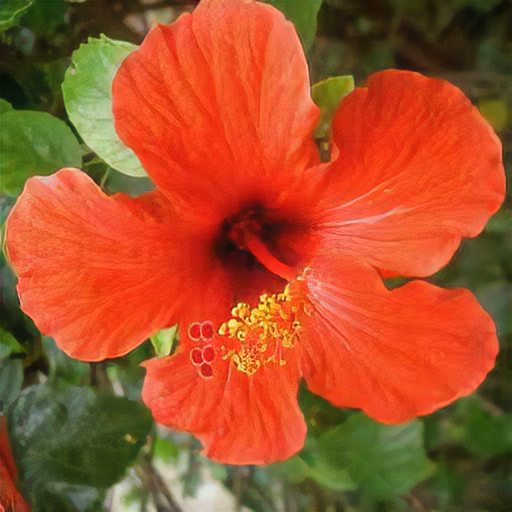

In [15]:
rdn = RDN(arch_params={'C': 6, 'D':20, 'G':64, 'G0':64, 'x':2})
rdn.model.load_weights('weights/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5')
sr_img = rdn.predict(np.array(compressed_img))
Image.fromarray(sr_img)

### Predictor Class
You can also use the predictor class to run the model on entire folders:

In [16]:
from ISR.predict import Predictor
!mkdir -p data/output
predictor = Predictor(input_dir='data/input/test_images/')
predictor.get_predictions(model=rdn, weights_path='weights/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5')

Creating output directory:
data/output/test_images
Loaded weights from 
 > weights/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5
Could not find weights training configuration
Results in:
 > data/output/test_images/rdn-C6-D20-G64-G064-x2/2019-12-01_16:36
Processing file
 > data/input/test_images/compressed.jpeg
Elapsed time: 72.18816685676575s
Result in: data/output/test_images/rdn-C6-D20-G64-G064-x2/2019-12-01_16:36/compressed.jpeg
Processing file
 > data/input/test_images/section8-image.png
Elapsed time: 71.38978314399719s
Result in: data/output/test_images/rdn-C6-D20-G64-G064-x2/2019-12-01_16:36/section8-image.png
